In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [92]:
data = pd.read_csv("AviationData.txt", delimiter="|")
data.describe()

,Event Id,Investigation Type,Accident Number,Event Date,Location,Country,Latitude,Longitude,Airport Code,Airport Name,...,Air Carrier,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Phase of Flight,Report Status,Publication Date,
count,74428,74428,74428,74428,74428,74428,74428,74428,74428,74428,...,74428,74428,74428,74428,74428,74428,74428,74428,74428,74428
unique,73349,2,74428,11561,23841,171,14701,15586,9200,21565,...,2726,115,41,62,359,4,13,4,3139,1
top,20001212X19172,Accident,ERA14FA068,06/30/1984,"ANCHORAGE, AK",United States,,,,,...,,0,0,0,1,VMC,LANDING,Probable Cause,,
freq,3,71584,1,25,372,70757,53144,53153,32705,29806,...,70752,40380,42975,40358,21333,66572,17747,69938,12840,74428


In [93]:
print(data.columns)
print(len(data))
print(data.head(2))
n_rows = data.shape[0]
n_cols = data.shape[1]
print(f"There are {n_rows} rows in the airplane crash dataset")
print(f"There are {n_cols} columns in the airplane crash dataset")

Index(['Event Id ', ' Investigation Type ', ' Accident Number ',
       ' Event Date ', ' Location ', ' Country ', ' Latitude ', ' Longitude ',
       ' Airport Code ', ' Airport Name ', ' Injury Severity ',
       ' Aircraft Damage ', ' Aircraft Category ', ' Registration Number ',
       ' Make ', ' Model ', ' Amateur Built ', ' Number of Engines ',
       ' Engine Type ', ' FAR Description ', ' Schedule ',
       ' Purpose of Flight ', ' Air Carrier ', ' Total Fatal Injuries ',
       ' Total Serious Injuries ', ' Total Minor Injuries ',
       ' Total Uninjured ', ' Weather Condition ', ' Broad Phase of Flight ',
       ' Report Status ', ' Publication Date ', ' '],
      dtype='object')
74428
         Event Id   Investigation Type   Accident Number    Event Date   \
0  20131208X92103             Accident        ERA14FA068    12/08/2013    
1  20131206X95526             Accident        ERA14FA066    12/06/2013    

            Location          Country     Latitude     Longitude   

In [94]:
drop_filtered = data.drop(columns=['Event Id ', ' Registration Number ', ' Make ', ' Model ', ' Amateur Built ', ' FAR Description ', ' Schedule ', ' Air Carrier ', ' Broad Phase of Flight ', ' Report Status ', ' Publication Date ']).iloc[:, :-1]

In [95]:
drop_filtered.describe()


,Investigation Type,Accident Number,Event Date,Location,Country,Latitude,Longitude,Airport Code,Airport Name,Injury Severity,Aircraft Damage,Aircraft Category,Number of Engines,Engine Type,Purpose of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition
count,74428,74428,74428,74428,74428,74428,74428,74428,74428,74428,74428,74428,74428,74428,74428,74428,74428,74428,74428,74428
unique,2,74428,11561,23841,171,14701,15586,9200,21565,117,4,10,6,13,23,115,41,62,359,4
top,Accident,ERA14FA068,06/30/1984,"ANCHORAGE, AK",United States,,,,,Non-Fatal,Substantial,,1,Reciprocating,Personal,0,0,0,1,VMC
freq,71584,1,25,372,70757,53144,53153,32705,29806,56615,53326,60773,59650,61069,41902,40380,42975,40358,21333,66572


In [96]:
drop_filtered_nan = drop_filtered.replace(r'^\s*$', np.NaN, regex=True)

In [97]:
drop_filtered_nan.head(1)

,Investigation Type,Accident Number,Event Date,Location,Country,Latitude,Longitude,Airport Code,Airport Name,Injury Severity,Aircraft Damage,Aircraft Category,Number of Engines,Engine Type,Purpose of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition
0,Accident,ERA14FA068,12/08/2013,"Jacksonville, FL",United States,30.319723,-81.514167,CRG,Jacksonville Executive Airport,Fatal(3),Substantial,Airplane,2,Reciprocating,Personal,3,NaN,NaN,NaN,IMC


In [98]:
data_frame_trimmed = drop_filtered_nan.apply(lambda x: x.str.strip() if x.dtype == "object" else x).rename(columns=lambda x: x.strip())



In [99]:
data_frame_trimmed.head(1)
data_frame_trimmed.columns

Index(['Investigation Type', 'Accident Number', 'Event Date', 'Location',
       'Country', 'Latitude', 'Longitude', 'Airport Code', 'Airport Name',
       'Injury Severity', 'Aircraft Damage', 'Aircraft Category',
       'Number of Engines', 'Engine Type', 'Purpose of Flight',
       'Total Fatal Injuries', 'Total Serious Injuries',
       'Total Minor Injuries', 'Total Uninjured', 'Weather Condition'],
      dtype='object')

In [100]:
data_frame_trimmed = data_frame_trimmed.drop(columns=['Total Serious Injuries', 'Total Minor Injuries', 'Total Uninjured']) # Columns that appear to be primarily empty

In [101]:
print(data_frame_trimmed.isna().sum())
#print(data_frame_trimmed.head())
data_frame_Na_fill = data_frame_trimmed.fillna(value={'Total Fatal Injuries': 0, 'Aircraft Category': 'Airplane'})


Investigation Type          0
Accident Number             0
Event Date                  2
Location                   89
Country                   511
Latitude                53144
Longitude               53153
Airport Code            32705
Airport Name            29806
Injury Severity            56
Aircraft Damage          2161
Aircraft Category       60773
Number of Engines        3230
Engine Type              2721
Purpose of Flight        3010
Total Fatal Injuries    19266
Weather Condition        1516
dtype: int64


In [102]:
print(data_frame_Na_fill.isna().mean()*100) # Percent of NaNs in data for each column

Investigation Type       0.000000
Accident Number          0.000000
Event Date               0.002687
Location                 0.119579
Country                  0.686570
Latitude                71.403235
Longitude               71.415328
Airport Code            43.941796
Airport Name            40.046757
Injury Severity          0.075241
Aircraft Damage          2.903477
Aircraft Category        0.000000
Number of Engines        4.339765
Engine Type              3.655882
Purpose of Flight        4.044177
Total Fatal Injuries     0.000000
Weather Condition        2.036868
dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f936d0a5ad0>]],
      dtype=object)

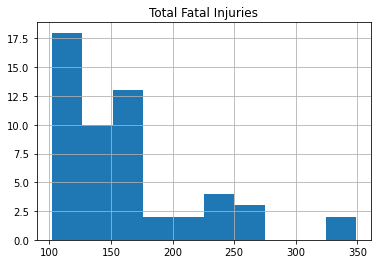

In [104]:
data_frame_Na_fill['Total Fatal Injuries'] = data_frame_Na_fill['Total Fatal Injuries'].astype(int)
data_frame_Na_fill[data_frame_Na_fill['Total Fatal Injuries'] > 100].hist()
